In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)


In [18]:

# 1. Geração de Dados Sintéticos

# Configurar seed para reprodutibilidade
np.random.seed(42)

# Gerar dados sintéticos
n_samples = 1000

# Características dos imóveis
area = np.random.normal(120, 40, n_samples)  # Área em m²
quartos = np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.1, 0.3, 0.35, 0.2, 0.05])
banheiros = np.random.choice([1, 2, 3, 4], n_samples, p=[0.2, 0.5, 0.25, 0.05])
idade = np.random.exponential(10, n_samples)  # Idade em anos
garagem = np.random.choice([0, 1], n_samples, p=[0.3, 0.7])  # 0: não, 1: sim

# Bairros com diferentes valorações
bairros = ['Centro', 'Zona Sul', 'Zona Norte', 'Zona Oeste', 'Zona Leste']
bairro_multiplicador = {'Centro': 1.3, 'Zona Sul': 1.5, 'Zona Norte': 0.9, 'Zona Oeste': 1.1, 'Zona Leste': 0.8}
bairro = np.random.choice(bairros, n_samples, p=[0.15, 0.25, 0.2, 0.2, 0.2])

print(f"Dados gerados: {n_samples} amostras")
print(f"Bairros únicos: {len(bairros)}")


# Calcular preço baseado nas características
preco_base = (
    area * 3000 +  # R$ 3000 por m²
    quartos * 15000 +  # R$ 15000 por quarto
    banheiros * 10000 +  # R$ 10000 por banheiro
    garagem * 25000 -  # R$ 25000 se tem garagem
    idade * 1000  # Depreciação de R$ 1000 por ano
)

# Aplicar multiplicador do bairro
preco = np.array([preco_base[i] * bairro_multiplicador[bairro[i]] for i in range(n_samples)])

# Adicionar ruído
preco += np.random.normal(0, 20000, n_samples)

# Garantir preços positivos
preco = np.abs(preco)

print(f"Preço médio calculado: R$ {preco.mean():,.2f}")
print(f"Preço mediano: R$ {np.median(preco):,.2f}")

# Criar DataFrame
df = pd.DataFrame({
    'area': area,
    'quartos': quartos,
    'banheiros': banheiros,
    'idade': idade,
    'garagem': garagem,
    'bairro': bairro,
    'preco': preco
})

Dados gerados: 1000 amostras
Bairros únicos: 5
Preço médio calculado: R$ 488,504.26
Preço mediano: R$ 457,487.42


In [19]:
# Limpar dados
print(f"Dataset original: {len(df)} amostras")

df = df[df['area'] > 30]  # Área mínima
df = df[df['preco'] > 50000]  # Preço mínimo
df = df[df['idade'] < 50]  # Idade máxima
df = df.reset_index(drop=True)

print(f"Dataset após limpeza: {len(df)} amostras")
print(f"Amostras removidas: {n_samples - len(df)}")


# Visualizar primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df.head())

print("\nÚltimas 5 linhas do dataset:")
display(df.tail())

 ## 2. Análise Descritiva


# Informações básicas do dataset
print("=== INFORMAÇÕES DO DATASET ===")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print(f"\nTipos de dados:")
print(df.dtypes)


print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
display(df.describe())


print("=== VALORES NULOS ===")
null_counts = df.isnull().sum()
print(null_counts)

if null_counts.sum() == 0:
    print("✅ Nenhum valor nulo encontrado!")
else:
    print("⚠️ Atenção: valores nulos encontrados!")


# Análise das variáveis categóricas
print("=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ===")
print("\nDistribuição por Bairro:")
bairro_counts = df['bairro'].value_counts()
print(bairro_counts)
print(f"\nPercentual por bairro:")
print((bairro_counts / len(df) * 100).round(2))


print("\nDistribuição por Número de Quartos:")
quartos_counts = df['quartos'].value_counts().sort_index()
print(quartos_counts)

print("\nDistribuição por Número de Banheiros:")
banheiros_counts = df['banheiros'].value_counts().sort_index()
print(banheiros_counts)

print("\nDistribuição por Garagem:")
garagem_counts = df['garagem'].value_counts()
print("Sem garagem:", garagem_counts[0])
print("Com garagem:", garagem_counts[1])
print(f"% com garagem: {garagem_counts[1]/len(df)*100:.1f}%")


Dataset original: 1000 amostras
Dataset após limpeza: 984 amostras
Amostras removidas: 16
Primeiras 5 linhas do dataset:


,area,quartos,banheiros,idade,garagem,bairro,preco
0,139.868566,2,2,10.450279,0,Zona Norte,400126.122658
1,114.469428,2,1,0.769949,0,Zona Oeste,416187.943469
2,145.907542,3,1,4.707542,1,Zona Norte,442924.309508
3,180.921194,3,2,16.286949,1,Centro,823804.522652
4,110.633865,1,3,5.682292,0,Zona Oeste,402452.118358



Últimas 5 linhas do dataset:


,area,quartos,banheiros,idade,garagem,bairro,preco
979,108.755988,2,3,0.825996,0,Zona Sul,619239.326850
980,191.907461,2,2,8.343665,0,Zona Leste,477652.059391
981,145.633714,3,2,23.861683,0,Zona Sul,759165.139073
982,97.152840,1,4,5.046988,1,Zona Leste,293826.985467
983,142.903311,1,1,3.514398,0,Zona Leste,332646.210685


=== INFORMAÇÕES DO DATASET ===
Shape: (984, 7)
Colunas: ['area', 'quartos', 'banheiros', 'idade', 'garagem', 'bairro', 'preco']

Tipos de dados:
area         float64
quartos        int64
banheiros      int64
idade        float64
garagem        int64
bairro        object
preco        float64
dtype: object

=== ESTATÍSTICAS DESCRITIVAS ===


,area,quartos,banheiros,idade,garagem,preco
count,984.000000,984.000000,984.000000,984.000000,984.000000,9.840000e+02
mean,121.442344,2.809959,2.160569,9.341083,0.701220,4.914064e+05
std,38.285078,1.035220,0.803496,8.773926,0.457956,1.823873e+05
min,31.554588,1.000000,1.000000,0.000307,0.000000,1.382248e+05
25%,94.817117,2.000000,2.000000,2.855801,0.000000,3.542938e+05
50%,121.170019,3.000000,2.000000,6.697531,1.000000,4.596822e+05
75%,146.019948,3.000000,3.000000,13.114059,1.000000,6.139950e+05
max,274.109260,5.000000,4.000000,49.038182,1.000000,1.258970e+06


=== VALORES NULOS ===
area         0
quartos      0
banheiros    0
idade        0
garagem      0
bairro       0
preco        0
dtype: int64
✅ Nenhum valor nulo encontrado!
=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ===

Distribuição por Bairro:
bairro
Zona Sul      243
Zona Leste    203
Zona Norte    194
Zona Oeste    191
Centro        153
Name: count, dtype: int64

Percentual por bairro:
bairro
Zona Sul      24.70
Zona Leste    20.63
Zona Norte    19.72
Zona Oeste    19.41
Centro        15.55
Name: count, dtype: float64

Distribuição por Número de Quartos:
quartos
1    102
2    278
3    363
4    187
5     54
Name: count, dtype: int64

Distribuição por Número de Banheiros:
banheiros
1    194
2    495
3    238
4     57
Name: count, dtype: int64

Distribuição por Garagem:
Sem garagem: 294
Com garagem: 690
% com garagem: 70.1%


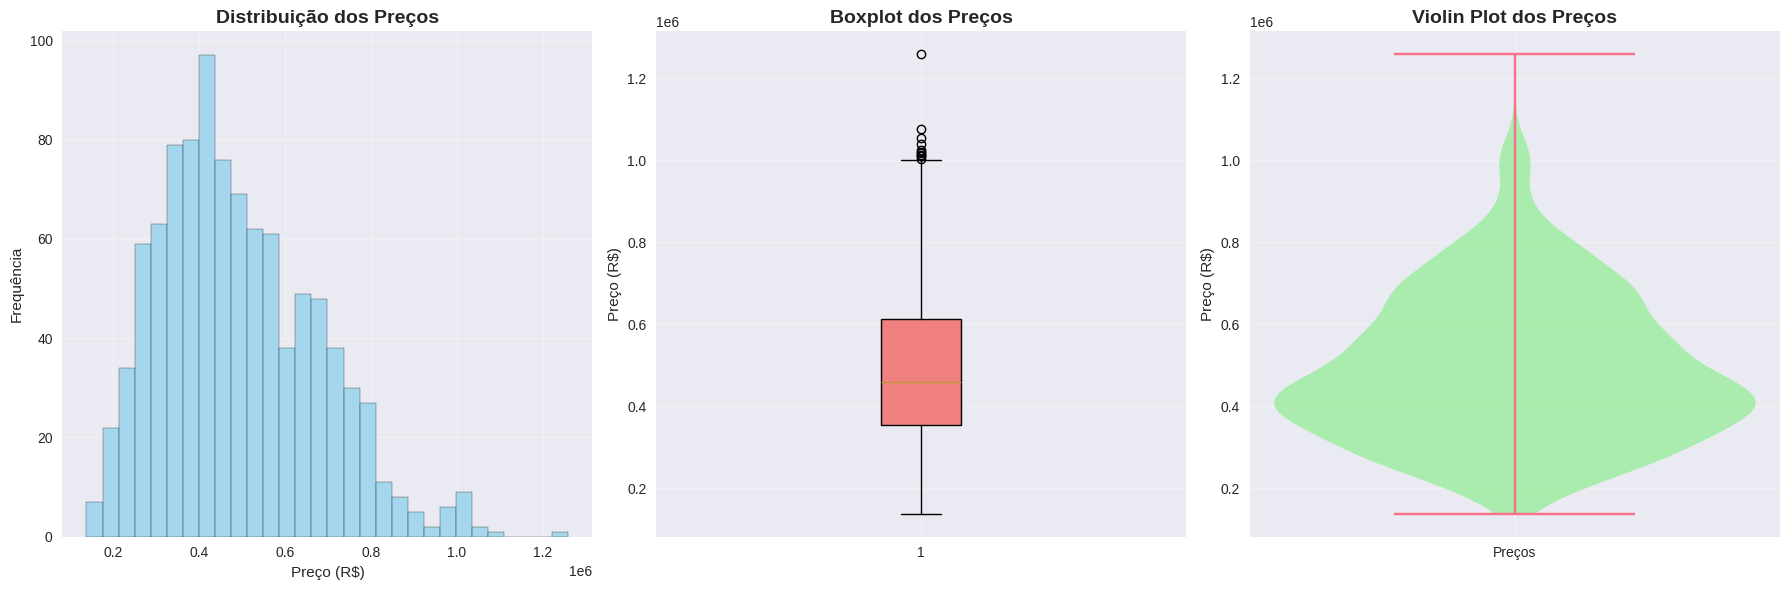

In [20]:
# ## 3. Visualizações Exploratórias


# Distribuição do preço
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
axes[0].hist(df['preco'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribuição dos Preços', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Preço (R$)')
axes[0].set_ylabel('Frequência')
axes[0].grid(True, alpha=0.3)

# Boxplot
bp = axes[1].boxplot(df['preco'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightcoral')
axes[1].set_title('Boxplot dos Preços', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Preço (R$)')
axes[1].grid(True, alpha=0.3)

# Violin plot
parts = axes[2].violinplot([df['preco']], positions=[1], widths=[0.5])
for pc in parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_alpha(0.7)
axes[2].set_title('Violin Plot dos Preços', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Preço (R$)')
axes[2].set_xticks([1])
axes[2].set_xticklabels(['Preços'])
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ESTATÍSTICAS DE PREÇO ===
Média: R$ 491,406.39
Mediana: R$ 459,682.17
Desvio padrão: R$ 182,387.35
Mínimo: R$ 138,224.78
Máximo: R$ 1,258,970.23
1º Quartil: R$ 354,293.75
3º Quartil: R$ 613,994.98


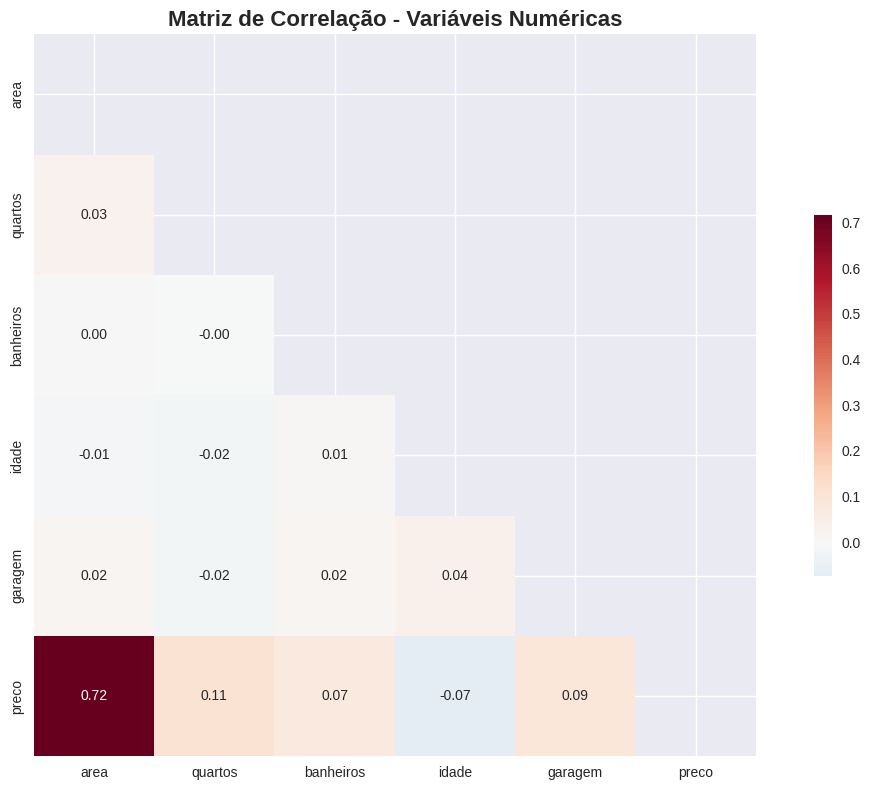

=== CORRELAÇÃO COM O PREÇO ===
area: 0.717 (correlação forte positiva)
quartos: 0.108 (correlação fraca positiva)
garagem: 0.088 (correlação fraca positiva)
idade: -0.074 (correlação fraca negativa)
banheiros: 0.069 (correlação fraca positiva)


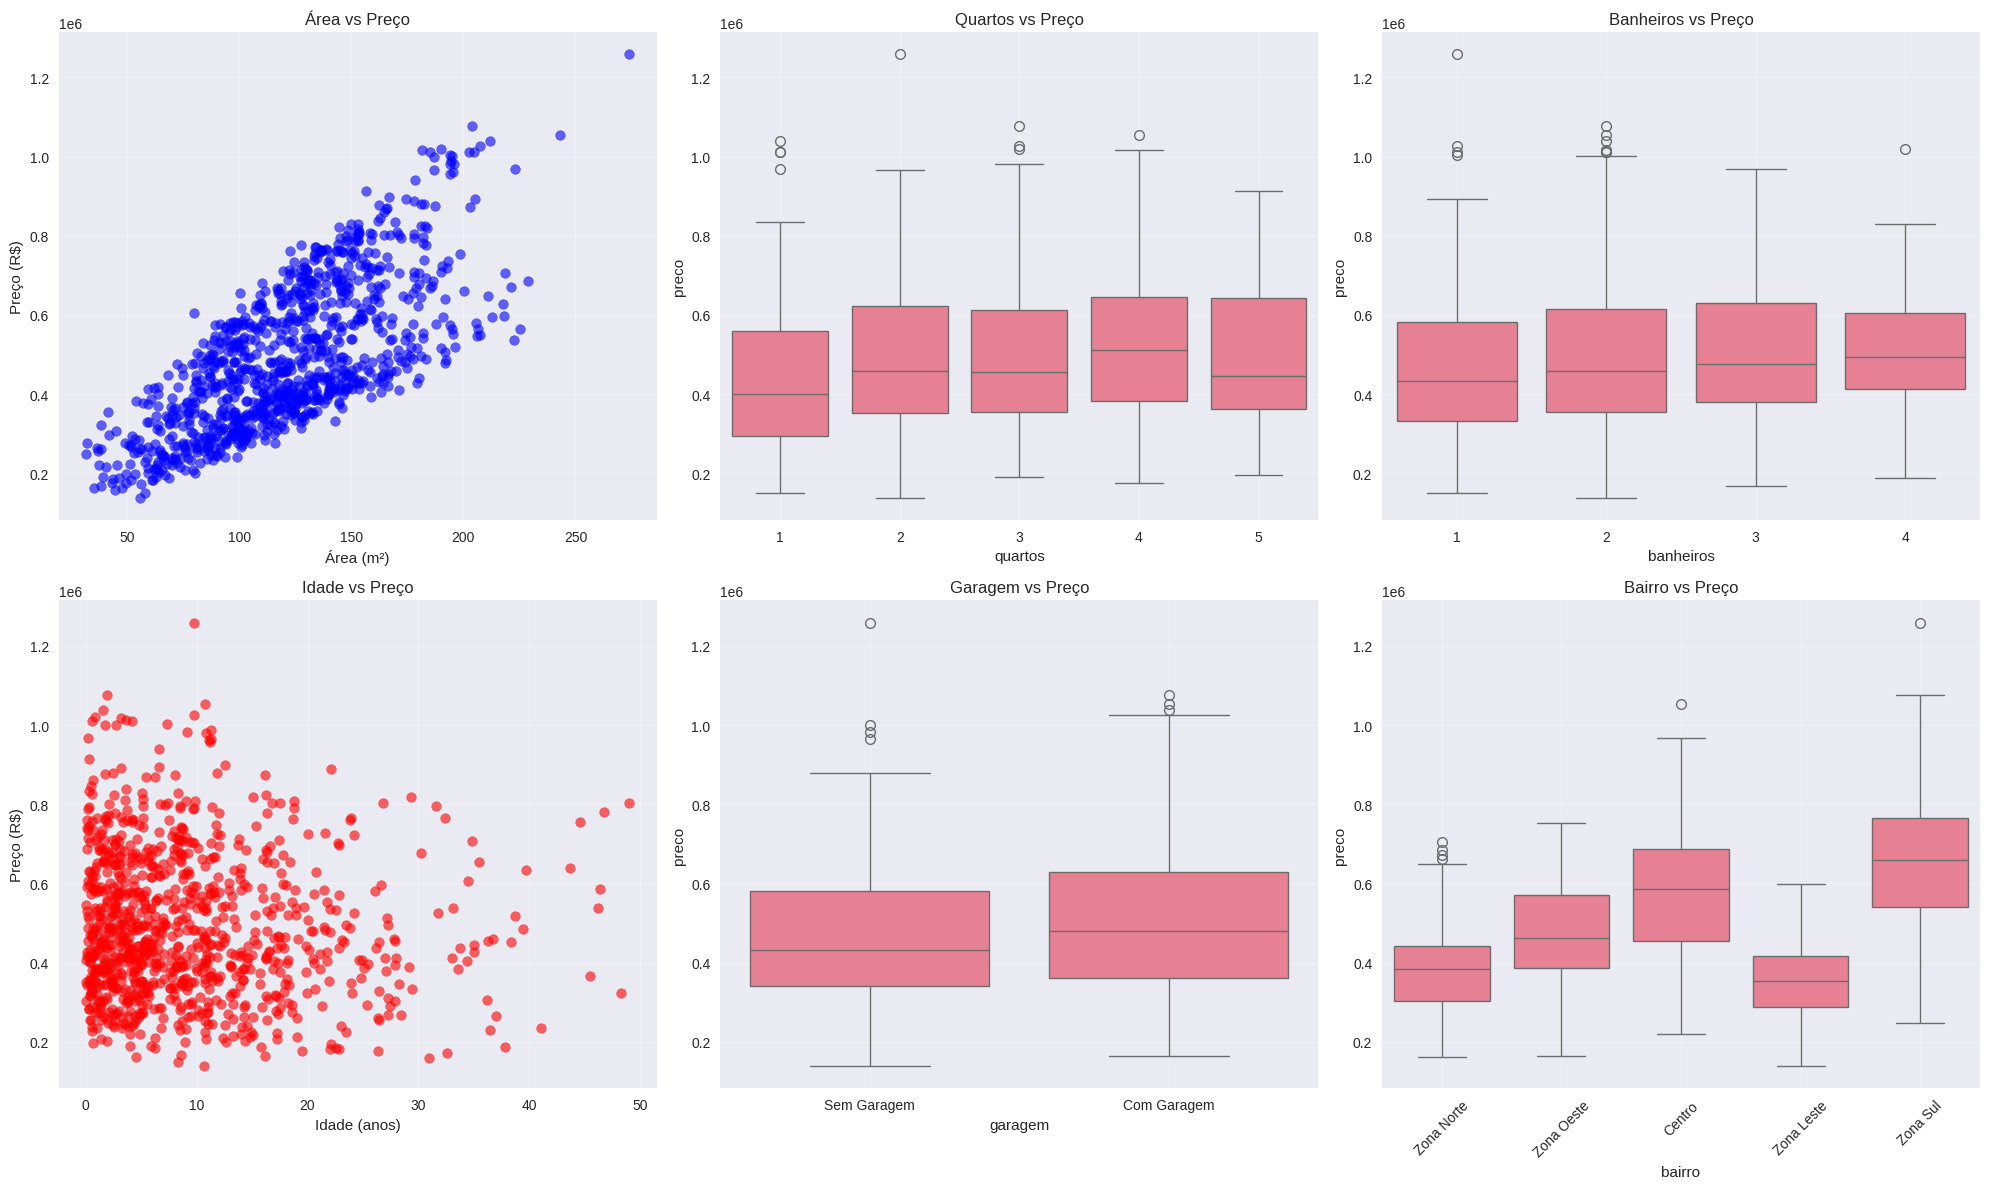

In [21]:
# Estatísticas de preço
print("=== ESTATÍSTICAS DE PREÇO ===")
print(f"Média: R$ {df['preco'].mean():,.2f}")
print(f"Mediana: R$ {df['preco'].median():,.2f}")
print(f"Desvio padrão: R$ {df['preco'].std():,.2f}")
print(f"Mínimo: R$ {df['preco'].min():,.2f}")
print(f"Máximo: R$ {df['preco'].max():,.2f}")
print(f"1º Quartil: R$ {df['preco'].quantile(0.25):,.2f}")
print(f"3º Quartil: R$ {df['preco'].quantile(0.75):,.2f}")


# Matriz de correlação
plt.figure(figsize=(12, 8))

# Selecionar apenas variáveis numéricas
numeric_cols = ['area', 'quartos', 'banheiros', 'idade', 'garagem', 'preco']
correlation_matrix = df[numeric_cols].corr()

# Criar heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.2f', 
            cbar_kws={'shrink': .5},
            mask=mask)

plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Análise de correlação com o preço
price_correlations = df[numeric_cols].corr()['preco'].sort_values(key=abs, ascending=False)
print("=== CORRELAÇÃO COM O PREÇO ===")
for var, corr in price_correlations.items():
    if var != 'preco':
        direction = "positiva" if corr > 0 else "negativa"
        strength = "forte" if abs(corr) > 0.7 else "moderada" if abs(corr) > 0.3 else "fraca"
        print(f"{var}: {corr:.3f} (correlação {strength} {direction})")


# Relação entre características e preço
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Área vs Preço
axes[0, 0].scatter(df['area'], df['preco'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Área (m²)')
axes[0, 0].set_ylabel('Preço (R$)')
axes[0, 0].set_title('Área vs Preço')
axes[0, 0].grid(True, alpha=0.3)

# Quartos vs Preço
sns.boxplot(data=df, x='quartos', y='preco', ax=axes[0, 1])
axes[0, 1].set_title('Quartos vs Preço')
axes[0, 1].grid(True, alpha=0.3)

# Banheiros vs Preço
sns.boxplot(data=df, x='banheiros', y='preco', ax=axes[0, 2])
axes[0, 2].set_title('Banheiros vs Preço')
axes[0, 2].grid(True, alpha=0.3)

# Idade vs Preço
axes[1, 0].scatter(df['idade'], df['preco'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Idade (anos)')
axes[1, 0].set_ylabel('Preço (R$)')
axes[1, 0].set_title('Idade vs Preço')
axes[1, 0].grid(True, alpha=0.3)

# Garagem vs Preço
sns.boxplot(data=df, x='garagem', y='preco', ax=axes[1, 1])
axes[1, 1].set_title('Garagem vs Preço')
axes[1, 1].set_xticklabels(['Sem Garagem', 'Com Garagem'])
axes[1, 1].grid(True, alpha=0.3)

# Bairro vs Preço
sns.boxplot(data=df, x='bairro', y='preco', ax=axes[1, 2])
axes[1, 2].set_title('Bairro vs Preço')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ANÁLISE DETALHADA POR BAIRRO ===


,Count,Preço_Médio,Preço_Mediano,Preço_Std,Preço_Min,Preço_Max,Área_Média,Quartos_Médio,Banheiros_Médio,Idade_Média,Garagem_%
bairro,,,,,,,,,,,
Centro,153,569666.42,587187.11,163275.02,220123.79,1053819.70,121.89,2.80,2.21,8.38,0.71
Zona Leste,203,357585.60,354385.66,95499.93,138224.78,598300.23,125.49,2.82,2.13,9.26,0.67
Zona Norte,194,379721.64,383023.50,105916.02,162330.94,704902.64,117.52,2.87,2.11,9.29,0.71
Zona Oeste,191,468885.73,461153.14,132190.28,163866.09,754046.52,119.33,2.76,2.22,10.44,0.71
Zona Sul,243,660789.62,660411.47,173193.65,248035.54,1258970.23,122.57,2.80,2.15,9.19,0.70


=== RANKING DE BAIRROS POR PREÇO MÉDIO ===
1. Zona Sul: R$ 660,789.62
2. Centro: R$ 569,666.42
3. Zona Oeste: R$ 468,885.73
4. Zona Norte: R$ 379,721.64
5. Zona Leste: R$ 357,585.60


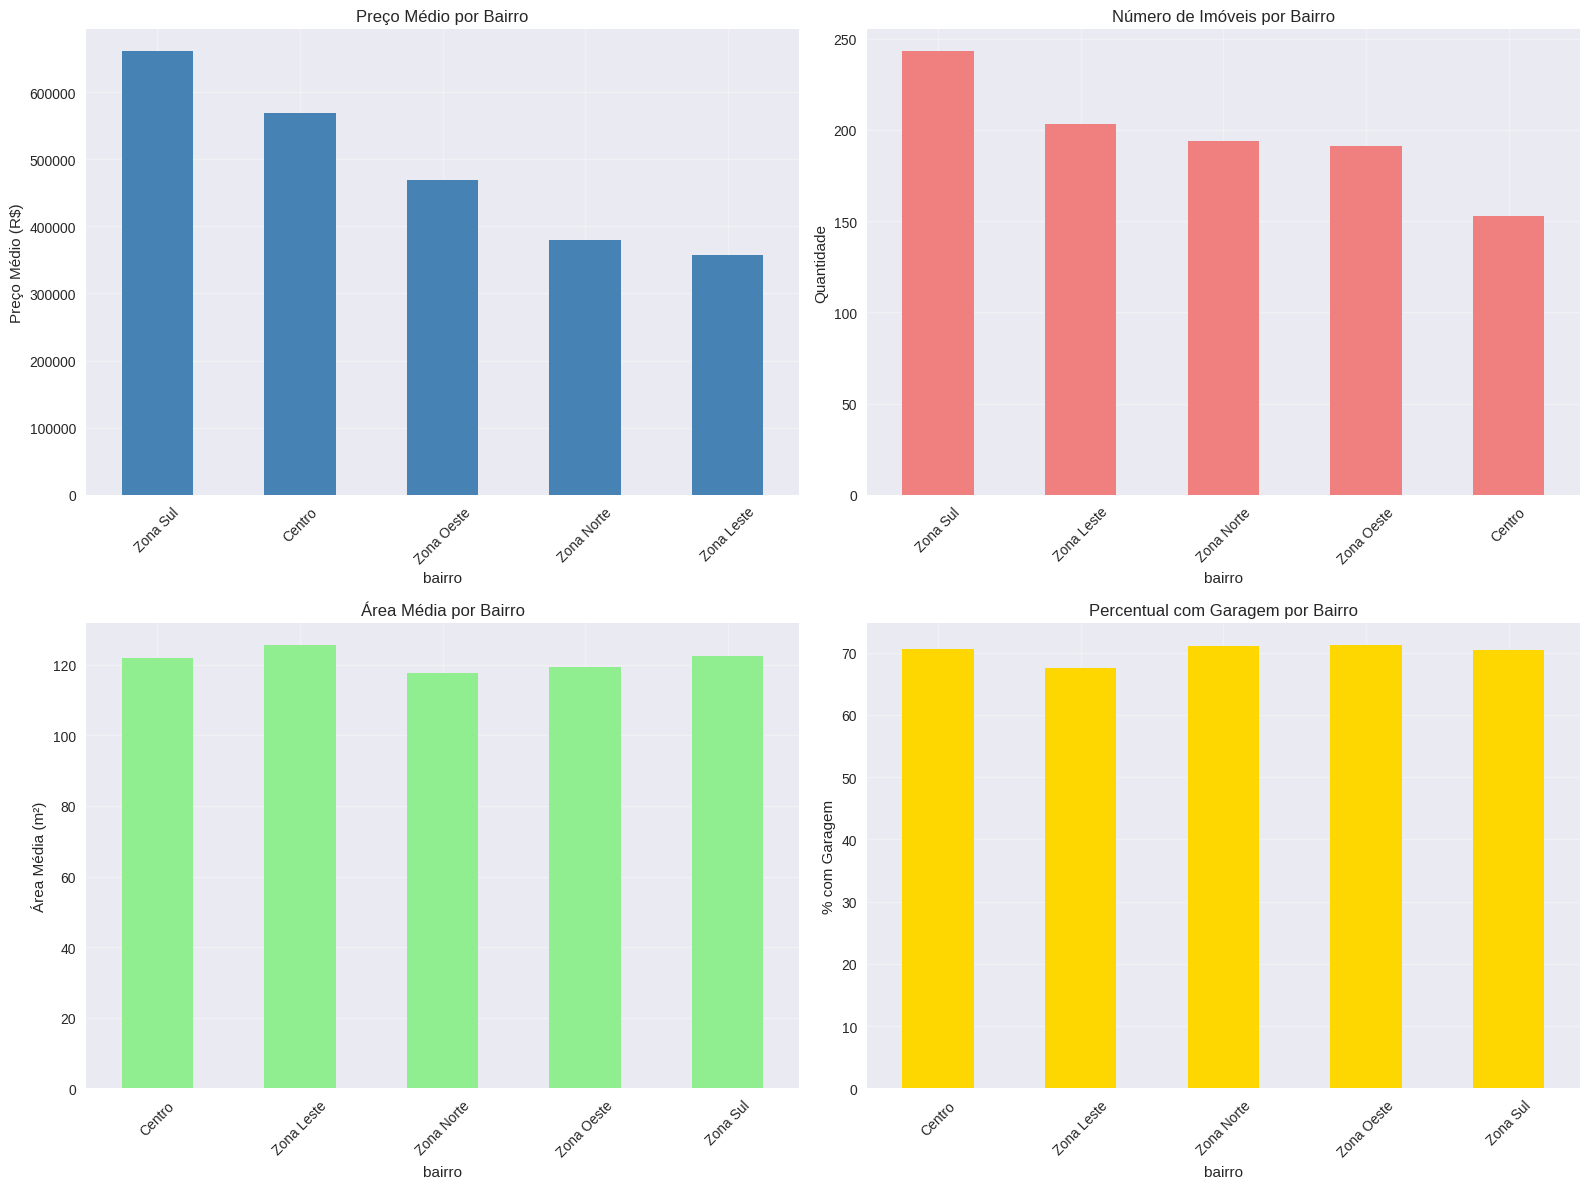

In [22]:
# ## 4. Análise por Bairro


# Estatísticas detalhadas por bairro
print("=== ANÁLISE DETALHADA POR BAIRRO ===")
bairro_stats = df.groupby('bairro').agg({
    'preco': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'area': 'mean',
    'quartos': 'mean',
    'banheiros': 'mean',
    'idade': 'mean',
    'garagem': 'mean'
}).round(2)

bairro_stats.columns = ['Count', 'Preço_Médio', 'Preço_Mediano', 'Preço_Std', 'Preço_Min', 'Preço_Max', 
                       'Área_Média', 'Quartos_Médio', 'Banheiros_Médio', 'Idade_Média', 'Garagem_%']

display(bairro_stats)


# Ranking de bairros por preço médio
print("=== RANKING DE BAIRROS POR PREÇO MÉDIO ===")
ranking_bairros = df.groupby('bairro')['preco'].mean().sort_values(ascending=False)
for i, (bairro, preco) in enumerate(ranking_bairros.items(), 1):
    print(f"{i}. {bairro}: R$ {preco:,.2f}")


# Visualização comparativa por bairro
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Preço médio por bairro
ranking_bairros.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Preço Médio por Bairro')
axes[0, 0].set_ylabel('Preço Médio (R$)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Número de imóveis por bairro
df['bairro'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Número de Imóveis por Bairro')
axes[0, 1].set_ylabel('Quantidade')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Área média por bairro
df.groupby('bairro')['area'].mean().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Área Média por Bairro')
axes[1, 0].set_ylabel('Área Média (m²)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Percentual com garagem por bairro
garagem_por_bairro = df.groupby('bairro')['garagem'].mean() * 100
garagem_por_bairro.plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Percentual com Garagem por Bairro')
axes[1, 1].set_ylabel('% com Garagem')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ANÁLISE DE OUTLIERS ===

AREA:
  Limites: [18.01, 222.82]
  Outliers encontrados: 5 (0.5%)
  Valores outliers: [228.80676666358477, 274.1092596261889, 243.15523233820952, 222.93439212999442, 225.29528259349564]...

PRECO:
  Limites: [-35258.09, 1003546.82]
  Outliers encontrados: 11 (1.1%)
  Valores outliers: [1003983.3540891766, 1017523.1856777781, 1025348.072987818, 1258970.2308030014, 1012405.349426106]...

IDADE:
  Limites: [-12.53, 28.50]
  Outliers encontrados: 38 (3.9%)
  Valores outliers: [46.75502210787052, 39.69541312324312, 32.421482115081915, 36.26190861720677, 37.02699856597469]...


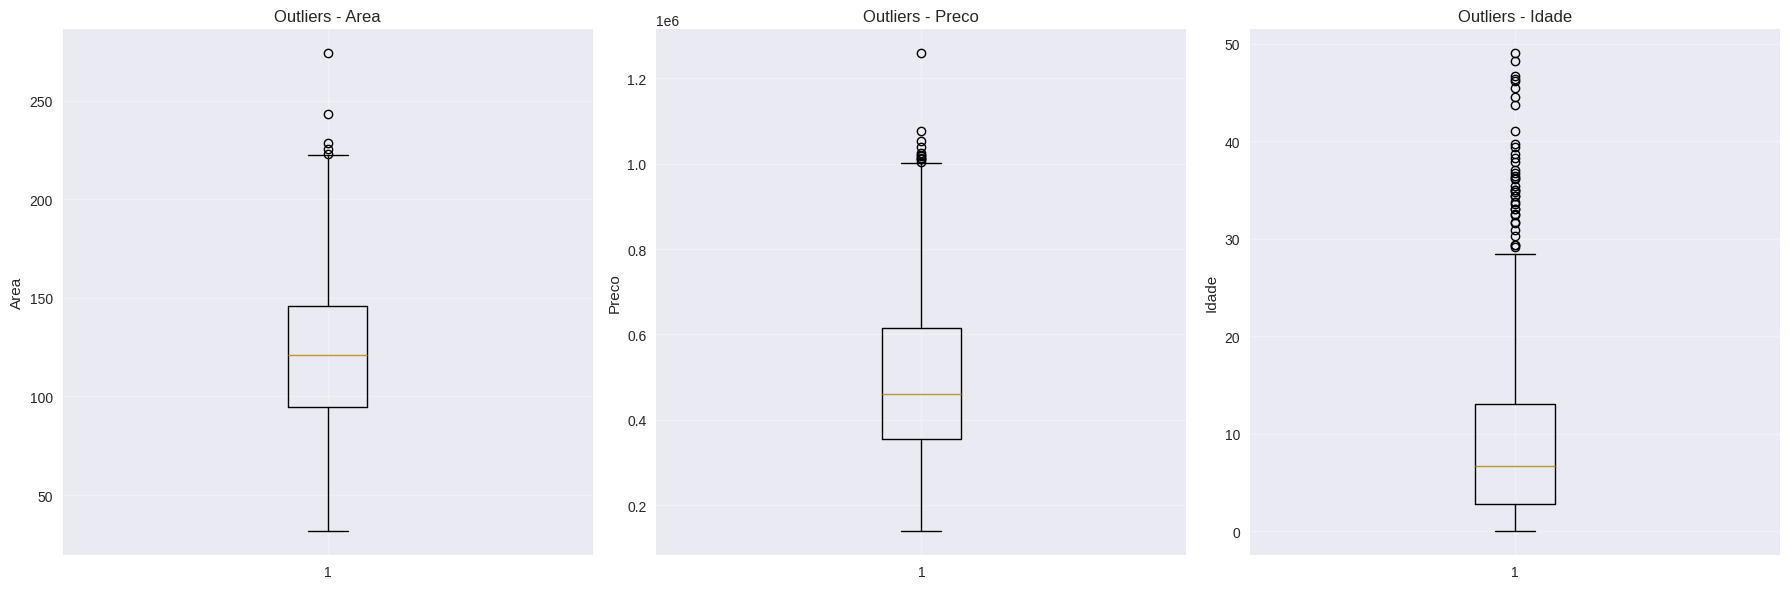

In [23]:
# ## 5. Análise de Outliers


# Função para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


# Análise de outliers para cada variável numérica
print("=== ANÁLISE DE OUTLIERS ===")
numeric_columns = ['area', 'preco', 'idade']

for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col.upper()}:")
    print(f"  Limites: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers encontrados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Valores outliers: {outliers[col].tolist()[:5]}...")  # Mostrar apenas os primeiros 5


# Visualização de outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Outliers - {col.title()}')
    axes[i].set_ylabel(col.title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Salvar dados processados
import os

# Criar diretórios se não existirem
os.makedirs('../data/raw', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

# Salvar dados brutos
df.to_csv('../data/raw/house_prices.csv', index=False)

print("✅ Dados salvos em '../data/raw/house_prices.csv'")
print(f"Shape do dataset final: {df.shape}")

✅ Dados salvos em '../data/raw/house_prices.csv'
Shape do dataset final: (984, 7)


In [25]:
# Resumo dos dados para modelagem
print("=== RESUMO PARA MODELAGEM ===")
print(f"Total de amostras: {len(df)}")
print(f"Variáveis numéricas: {len(numeric_cols)}")
print(f"Variáveis categóricas: 1 (bairro)")

print(f"\nTarget (preço):")
print(f"  Média: R$ {df['preco'].mean():,.2f}")
print(f"  Mediana: R$ {df['preco'].median():,.2f}")
print(f"  Desvio padrão: R$ {df['preco'].std():,.2f}")
print(f"  Coef. variação: {df['preco'].std()/df['preco'].mean()*100:.1f}%")

=== RESUMO PARA MODELAGEM ===
Total de amostras: 984
Variáveis numéricas: 6
Variáveis categóricas: 1 (bairro)

Target (preço):
  Média: R$ 491,406.39
  Mediana: R$ 459,682.17
  Desvio padrão: R$ 182,387.35
  Coef. variação: 37.1%


In [26]:
# Features para o modelo
features_numericas = ['area', 'quartos', 'banheiros', 'idade', 'garagem']
features_categoricas = ['bairro']

print(f"\nFeatures numéricas: {features_numericas}")
print(f"Features categóricas: {features_categoricas}")




Features numéricas: ['area', 'quartos', 'banheiros', 'idade', 'garagem']
Features categóricas: ['bairro']
